## IMDB 데이터셋

In [1]:
#리뷰 데이터셋은 영어로 된 문장이지만 이미 토큰화 시킨 데이터가 텐서플로에 있다
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(
                                                         num_words =500)

17465344/17464789 [==============================] - 1s 0us/step


In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [6]:
#무슨 내용인지 보자
#온통 숫자네..
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
#타깃데이터 확인
print(train_target[:20])
#리뷰가 긍정인지 부정인지 판단하기위해 이진분류로 해놓은 것

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
#훈련세트에서 검증세트 떼놓자
from sklearn.model_selection import train_test_split
train_input, val_input, train_target,  val_target = train_test_split(
        train_input, train_target, test_size=0.2, random_state =42)

In [9]:
#가장 긴 리뷰의 길이를 확인하기 위해 길이를 재자
import numpy as np
lengths = np.array([len(x) for x in train_input])
#함수로 길이의 평균과 중간값을 구해보자
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


frequency


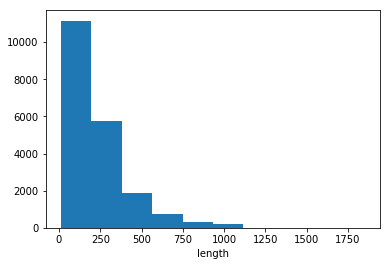

In [11]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
print('frequency')
plt.show()

In [12]:
#단어의 개수가 100이 되도록 잘라 낼 것 (길이가 100)
#함수 있음 pad_sequences
#단어 크기 100개로 자른다
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)


In [14]:
print(train_seq.shape)

(20000, 100)


In [15]:
#검증셋 길이도 100으로 맞추자
val_seq = pad_sequences(val_input, maxlen = 100)

## 순환신경망 만들자

In [17]:
from tensorflow import keras 
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
